In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [ ]:
# Read Dataset
df = pd.read_csv('https://raw.githubusercontent.com/j-sherwin/ccfraud-ml/refs/heads/main/card_transdata.csv')

In [ ]:
# Inspect the first 5 dataset entries
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Inspect cell value types and count. Inspect for null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Text(0.5, 1.0, 'Dataset Count of Non-Fraudulent vs Fraudulent Transactions')

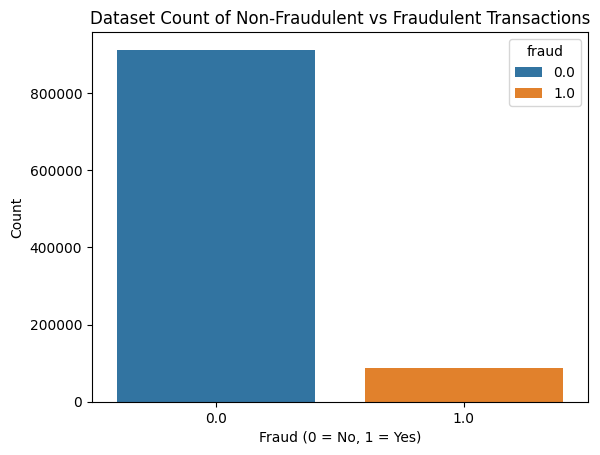

In [ ]:
# Create histogram
sns.countplot(x='fraud',data=df,hue="fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title('Dataset Count of Non-Fraudulent vs Fraudulent Transactions')

Text(0.5, 1.0, 'Correlation Heatmap')

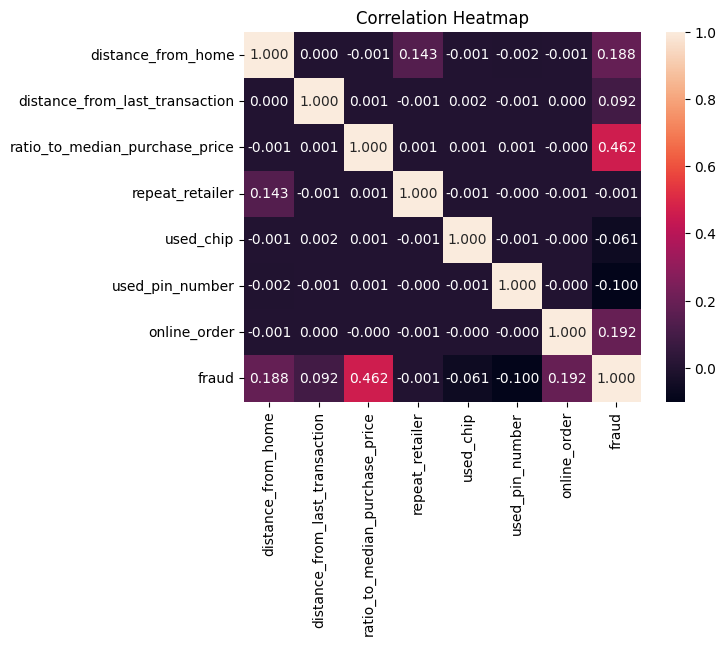

In [ ]:
# Create correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".3f")
plt.title('Correlation Heatmap')

In [ ]:
# Split data into testing and training groups
X = df.drop('fraud',axis=1)
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create the Logistic Regression model
logmodel = LogisticRegression(class_weight={0: 1, 1: 3.5}, max_iter=500)

In [ ]:
# Train the model on the training data that was split
logmodel.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 3.5}, max_iter=500)

In [ ]:
# Use the model to create predictions using the test data that was split
predictions = logmodel.predict(X_test)

In [ ]:
# View the accuracy, precision, recall, and f1-score of the prediction results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98    273871
         1.0       0.73      0.85      0.79     26129

    accuracy                           0.96    300000
   macro avg       0.86      0.91      0.88    300000
weighted avg       0.96      0.96      0.96    300000



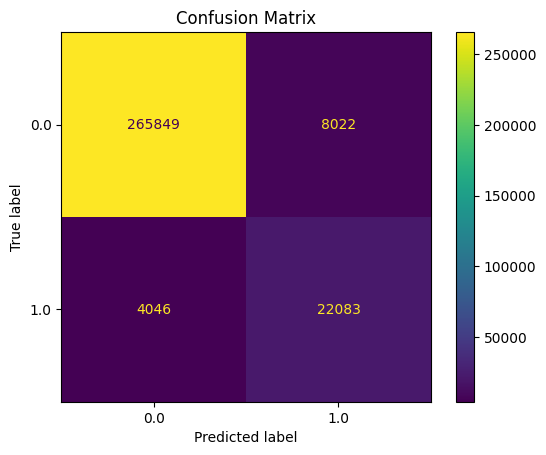

In [ ]:
# Create a confusion Matrix of the results
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logmodel.classes_)
disp.plot(values_format="d")
plt.title('Confusion Matrix')
plt.grid(False)

In [ ]:
# Create interactive widgets for utilizing the trained model

def predict_fraud(distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order):
    data_input = pd.DataFrame(
        [[distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order]],
        columns=['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']
    )

    prediction = logmodel.predict(data_input)

    if prediction[0] == 1:
        return "This transaction is predicted to be fraudulent."
    else:
        return "This transaction is predicted to be be non-fraudulent."

layout = widgets.Layout(width='75%', height='50px')
style = {'description_width': 'initial'}

dfh_widget = widgets.FloatSlider(min=0, max=1000, step=.1, value=1, description='Distance From Home:',style=style,layout=layout)
dflt_widget = widgets.FloatSlider(min=0, max=1000, step=.1, value=1, description='Distance From Last Transaction:',style=style,layout=layout)
ratio_widget = widgets.FloatSlider(min=0, max=10, step=.01, value=.5, description='Ratio To Median Purchase Price:',style=style,layout=layout)
repeat_widget = widgets.Checkbox(value=False, description='Repeat Retailer?', disabled=False,indent=False,style=style,layout=layout)
chip_widget = widgets.Checkbox(value=False, description='Used Chip?', disabled=False,indent=False,style=style,layout=layout)
pin_widget = widgets.Checkbox(value=False, description='Used Pin Number?', disabled=False,indent=False,style=style,layout=layout)
online_widget = widgets.Checkbox(value=False, description='Online Order?', disabled=False,indent=False,style=style,layout=layout)

predict_button = widgets.Button(description="Predict Fraud")

prediction_output = widgets.Output()

def on_predict_button_click(b):
    with prediction_output:
        prediction_output.clear_output()

        distance_from_home = dfh_widget.value
        distance_from_last_transaction = dflt_widget.value
        ratio_to_median_purchase_price = ratio_widget.value
        repeat_retailer = 1 if repeat_widget.value else 0
        used_chip = 1 if chip_widget.value else 0
        used_pin_number = 1 if pin_widget.value else 0
        online_order = 1 if online_widget.value else 0

        print(predict_fraud(distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order))

predict_button.on_click(on_predict_button_click)

display(widgets.VBox([
    dfh_widget,
    dflt_widget,
    ratio_widget,
    repeat_widget,
    chip_widget,
    pin_widget,
    online_widget,
    predict_button,
    prediction_output
]))
